img_name: 7_Cheering_Cheering_7_74.jpg


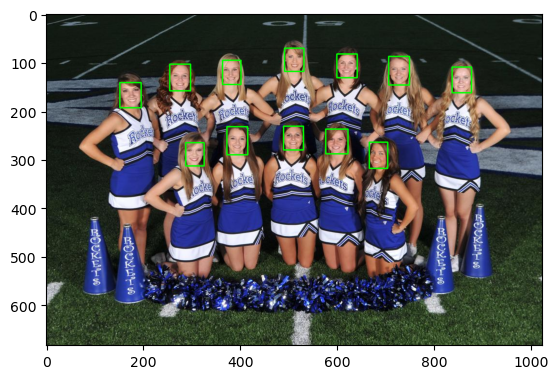

img_name: 7_Cheering_Cheering_7_543.jpg


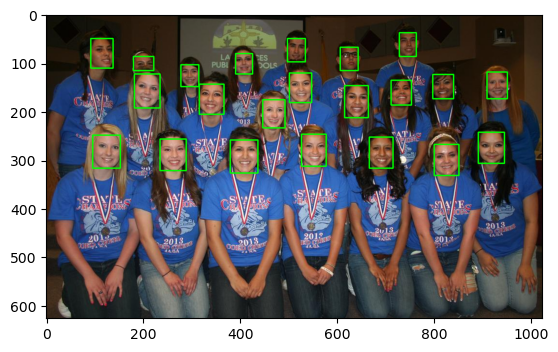

img_name: 7_Cheering_Cheering_7_889.jpg


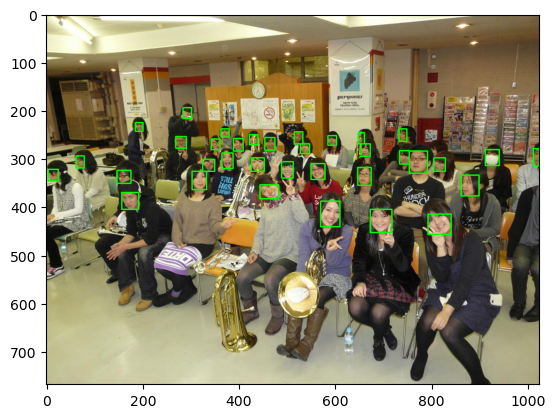

Checking cropped images...
7_Cheering_Cheering_7_74 12


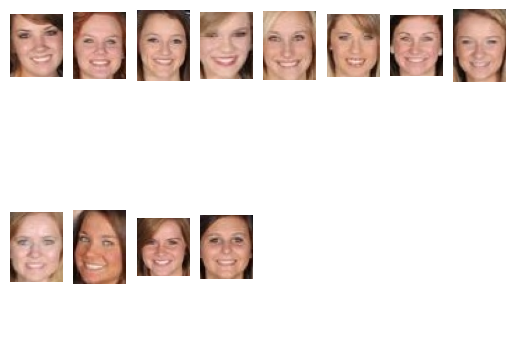

7_Cheering_Cheering_7_543 22


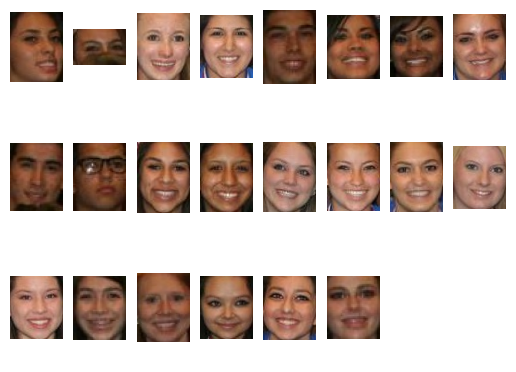

7_Cheering_Cheering_7_889 35


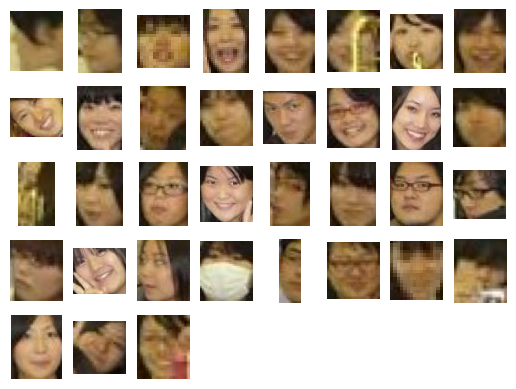

Face Detection using dlib:
image_name:7_Cheering_Cheering_7_74.jpg, shape:(683,1024), #det:12
(After resizing...)
image_name:7_Cheering_Cheering_7_74.jpg, shape:(1400,2098), #det:12


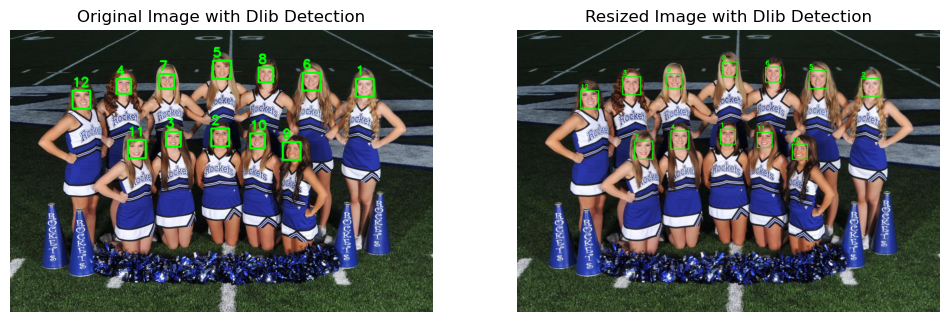

image_name:7_Cheering_Cheering_7_543.jpg, shape:(626,1024), #det:21
(After resizing...)
image_name:7_Cheering_Cheering_7_543.jpg, shape:(1400,2290), #det:21


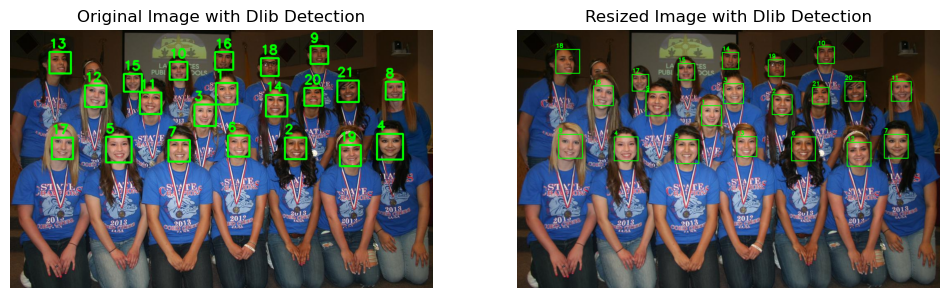

image_name:7_Cheering_Cheering_7_889.jpg, shape:(768,1024), #det:7
(After resizing...)
image_name:7_Cheering_Cheering_7_889.jpg, shape:(1400,1866), #det:13


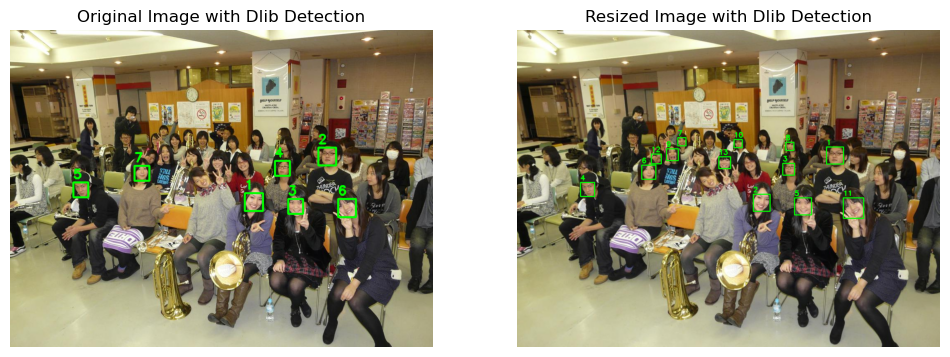

In [3]:
import os, sys
import pickle
import numpy as np
import cv2
import dlib
import matplotlib.pyplot as plt
%matplotlib inline

pkl_path = 'annotation.pkl'
annotate_dict = pickle.load(open(pkl_path, "rb"))
data_dir = 'data_dir'

def draw_bbox():
  # Enter your code here and remove the following pass (20%)
  for img_name in annotate_dict:
    # get the image name from img_name
    print('img_name:', img_name)
    # image are store in data_dir, so need to join data_dir and img_name to get true filepath
    img_path = os.path.join(data_dir, img_name)
    # use cv2.imread() to read from the image path
    img = cv2.imread(img_path)
    # Examine the read image is successful or not
    if img is not None:
      # opencv is in default reading in BGR, so transfer to RGB
      img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    else:
        print('Image reading ERROR')
        continue
    for bbox in annotate_dict[img_name]:
      # draw bounding boxes on the image (green color)
      cv2.rectangle(img_rgb, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (0, 255, 0), 2)
    # use plt.imshow() to show the image
    plt.imshow(img_rgb)
    plt.show()  # Add this line to display each image

def save_bbox():
  save_dir = 'save_dir' # Do not change this line
  # Enter your code here (20%)    
  for img_name in annotate_dict:
    # get the image path from img_name
    # image are store in data_dir, so need to join data_dir and img_name to get true filepath
    img_path = os.path.join(data_dir, img_name)
    # use cv2.imread() to read from the image path
    img = cv2.imread(img_path)
    # Examine the read image is successful or not
    if img is None:
      print('Image reading ERROR')
      continue
    for counter, bbox in enumerate(annotate_dict[img_name]):
      # bounding box stored in 4-tuple
      x1, y1, x2, y2 = bbox 
      # crop faces according to bbox
      crop_img = img[y1:y2, x1:x2]
      # create the save_path for the cropped face
      if not os.path.exists(save_dir):  # examine the folder if it exists
        os.makedirs(save_dir, exist_ok=True)
      save_name = img_name[:-4] + '_' + str(counter) + '.jpg'  # remove the .jpg from img_name and add counter
      save_path = os.path.join(save_dir, save_name)# join the save_dir and save_name to get the true filepath
      # use cv2.imwrite() to save the cropped face
      # write "crop_img" to the "save_path"
      # opencv imread first read in BGR, and imwrite also works in BGR, so save image in BGR
      cv2.imwrite(save_path, crop_img)

# Do not modify the following two functions. They will be used to check your code.
def display_img_list(img_list):
     col = 8
     row = int(np.ceil(len(img_list)/8))
     k = 0
     fig, ax = plt.subplots(row, col)
     for i in range(row):
       for j in range(col):
         k = j+i*col
         if k < len(img_list):
           ax[i,j].imshow(img_list[k])
         ax[i,j].axis('off')
     plt.show()

def check_bbox():
  save_dir = 'save_dir'
  data_dict = {}
  if not os.path.exists(save_dir):
     print('save_dir is not created!')
     return
  if len(os.listdir(save_dir)) < 10:
     print('cropped faces are not generated!')
     return
  for img_name in annotate_dict:
     img_name = img_name[:-4]
     data_dict[img_name] = []
     for bbox_name in os.listdir(save_dir):
       if img_name in bbox_name:
         bbox_path = os.path.join(save_dir, bbox_name)
         img = cv2.imread(bbox_path)
         # reverse the last dimension to convert BGR to RGB
         data_dict[img_name].append(img[:,:,::-1])
  for img_name in data_dict:
     print(img_name, len(data_dict[img_name]))
     display_img_list(data_dict[img_name])

def dlib_detector(image):
  # using dlib to detect faces (original image)
  detector = dlib.get_frontal_face_detector()
  dets = detector(image, 1)
  # avoid modifying the original image
  image_copy = image.copy()
  for i, det in enumerate(dets):
    x1, y1, x2, y2 = det.left(), det.top(), det.right(), det.bottom()
    # draw bounding box based on x1, y1, x2, y2 (green color)
    cv2.rectangle(image_copy, (x1, y1), (x2, y2), (0, 255, 0), 4)
    # show face detected number
    cv2.putText(image_copy, str(i+1), (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0,255,0), 4)
  return image_copy, len(dets)

def test_dlib():
  # Enter your code here and remove the following pass (30%)

  for img_name in annotate_dict:
    # image are store in data_dir, so need to join data_dir and img_name to get true filepath
    img_path = os.path.join(data_dir, img_name)
    # use cv2.imread() to read from the image path
    img = cv2.imread(img_path)
    # Examine the read image is successful or not
    if img is None:
      print('Image reading ERROR')
      continue
    # opencv is in default reading in BGR, so transfer to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      
    # show the dected image and the resized image side by side
    fig, ax = plt.subplots(1, 2, figsize=(12, 10))

    # using dlib to detect faces (original image)
    detect_original, len_dets = dlib_detector(img_rgb)
    ax[0].imshow(detect_original)
    ax[0].title.set_text('Original Image with Dlib Detection')
    ax[0].axis('off')

    # Now resize the image and do it again
    # resize the image with height = 1400 and aspect ratio (h/w) preserved
    h, w = img.shape[:2]
    new_height = 1400
    new_width = int(w * (new_height / h))
    # Resize the image
    resized_image = cv2.resize(img_rgb, (new_width, new_height))

    # using dlib to detect faces (resized image)
    detect_resize, len_resized_dets = dlib_detector(resized_image)
    ax[1].imshow(detect_resize)
    ax[1].title.set_text('Resized Image with Dlib Detection')
    ax[1].axis('off')

    print(f'image_name:{img_name}, shape:({h},{w}), #det:{len_dets}')
    print('(After resizing...)')
    print(f'image_name:{img_name}, shape:({new_height},{new_width}), #det:{len_resized_dets}')
    plt.show()  # Add this line to display each image

if __name__ == '__main__':
  # When submitting assignment_2a, please do not modify the following lines  
  draw_bbox()
  save_bbox()
  print('Checking cropped images...')  
  check_bbox()
  print('Face Detection using dlib:')
  test_dlib()